Loading the mushroom dataset...

Here's what the first few rows look like:
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal   

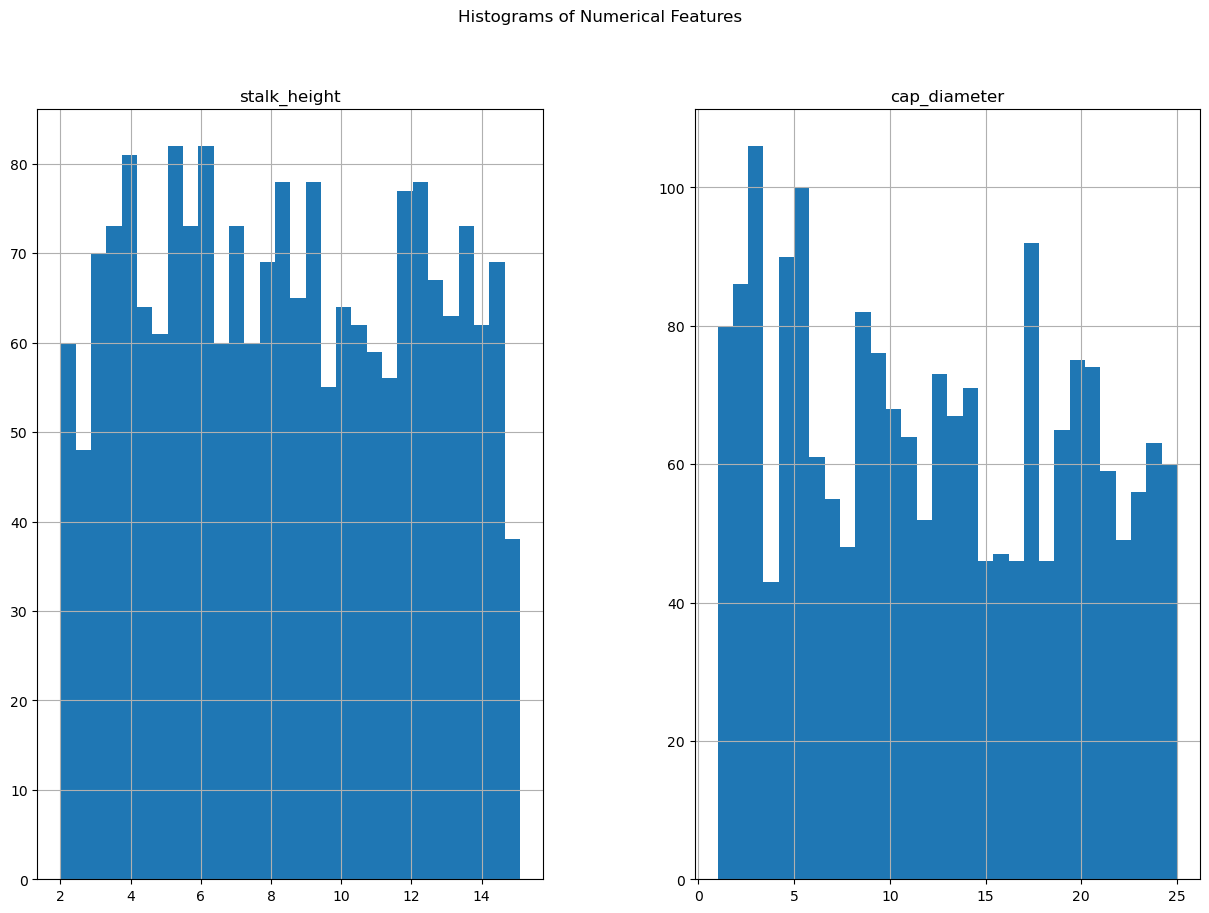


Creating a correlation matrix for numerical features...


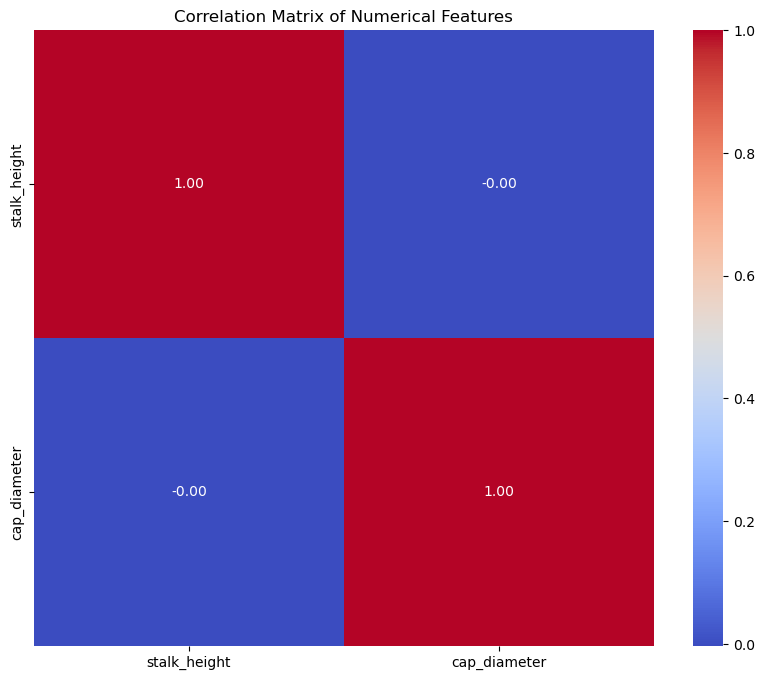


Visualizing the distribution of categorical features...


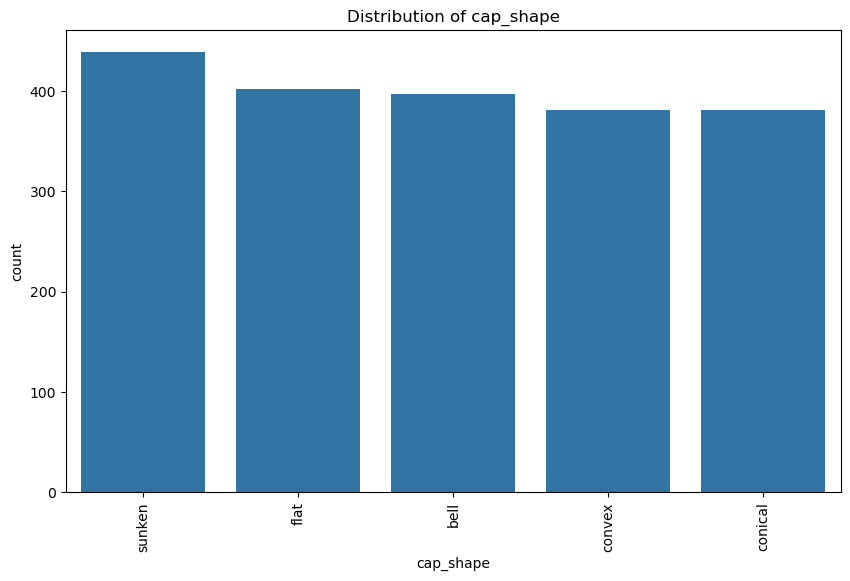

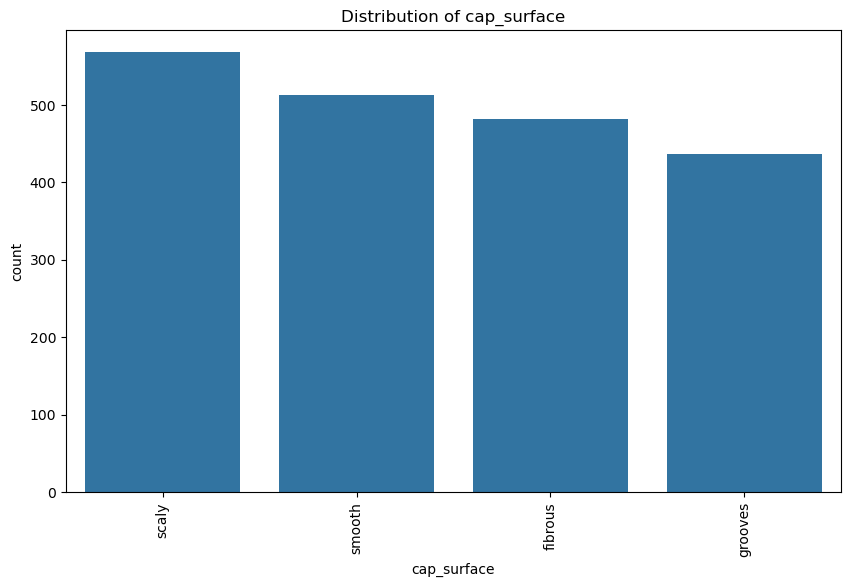

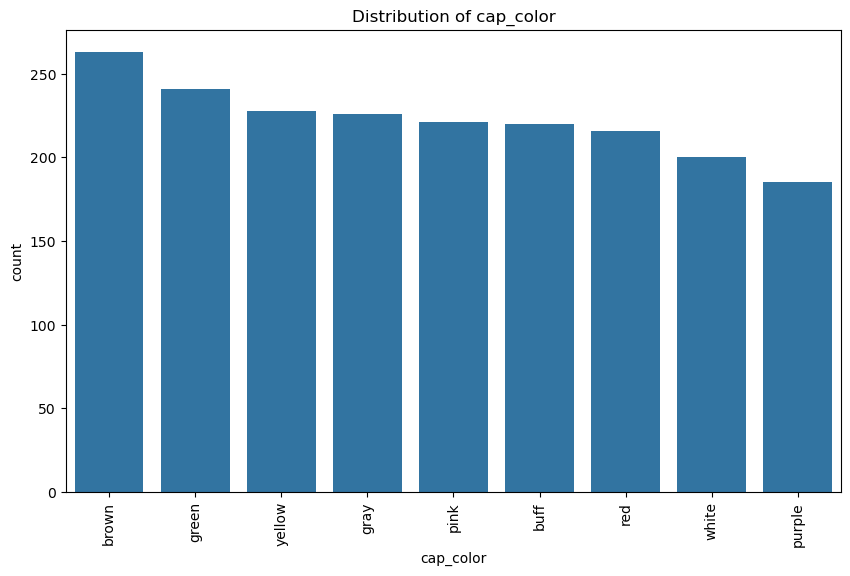

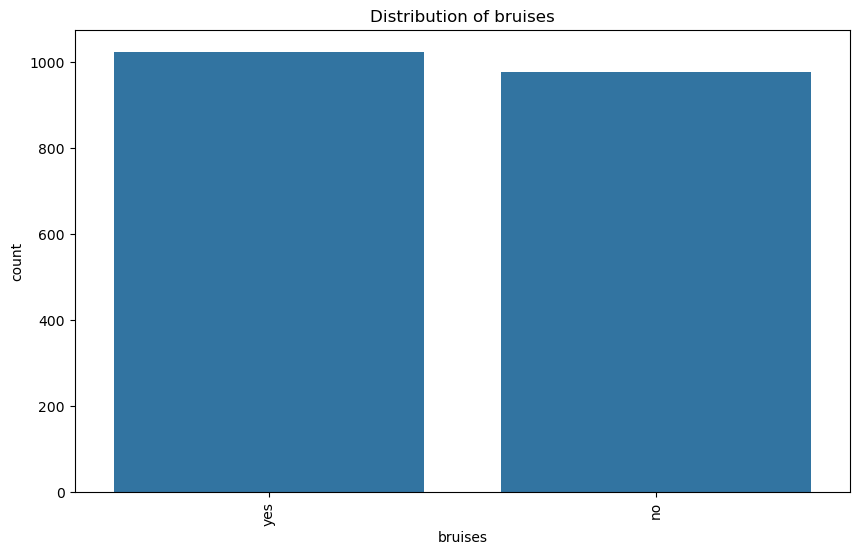

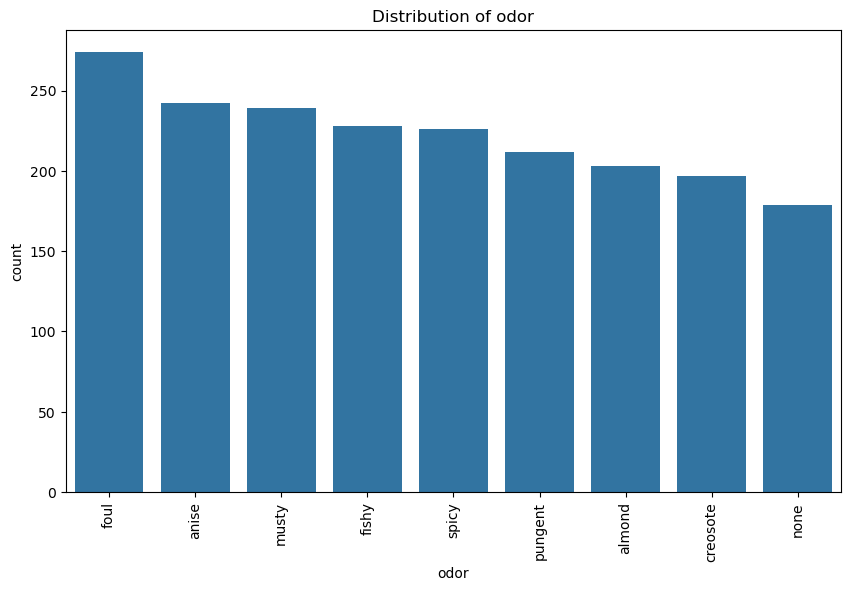

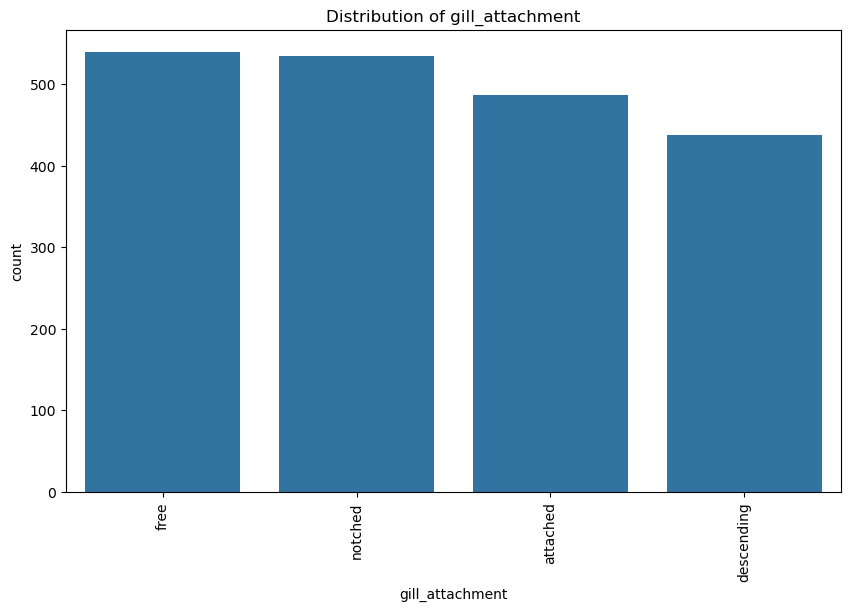

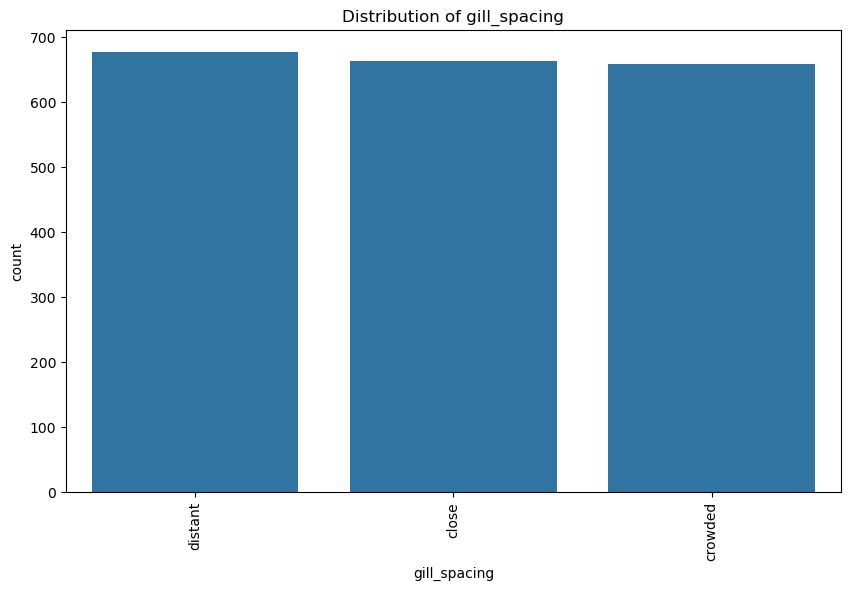

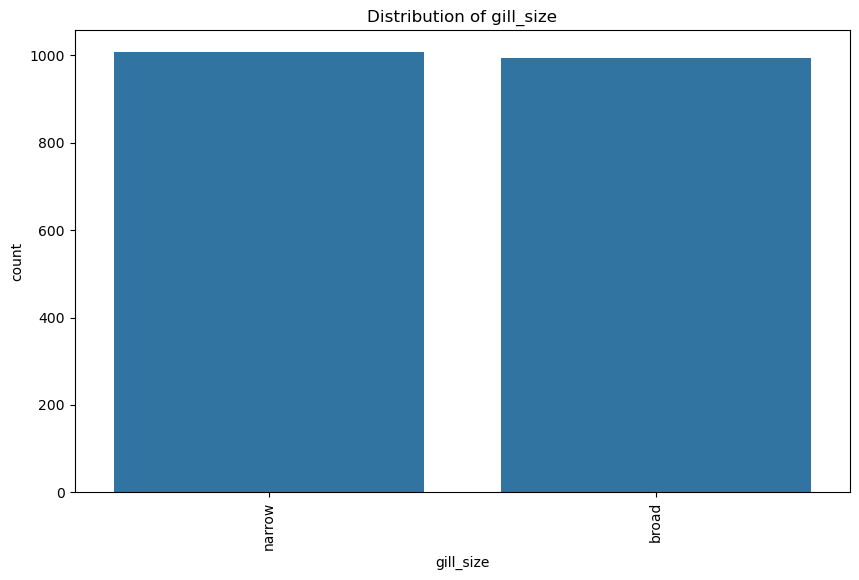

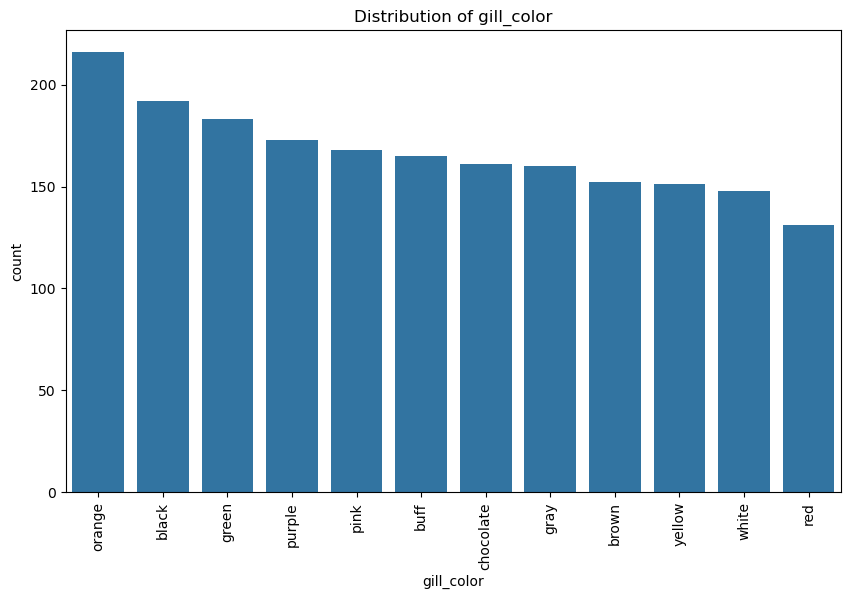

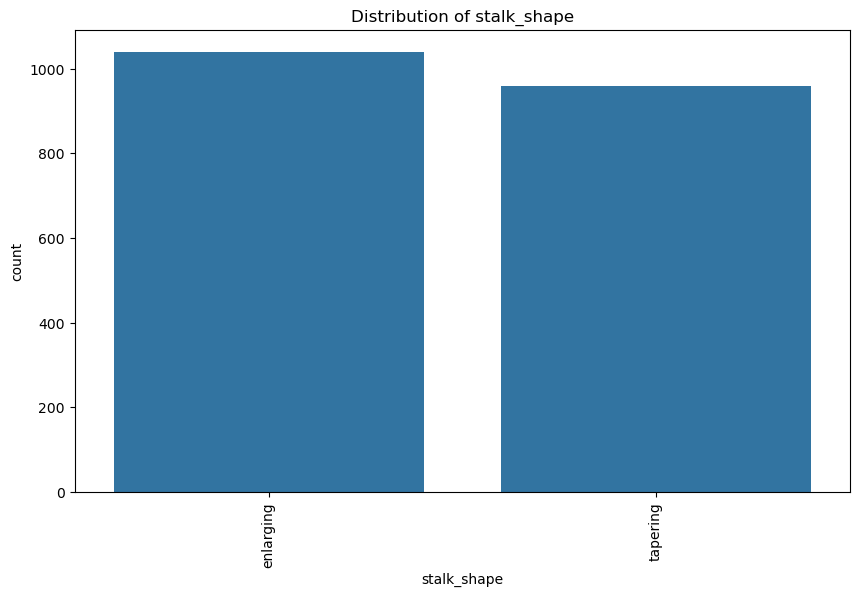

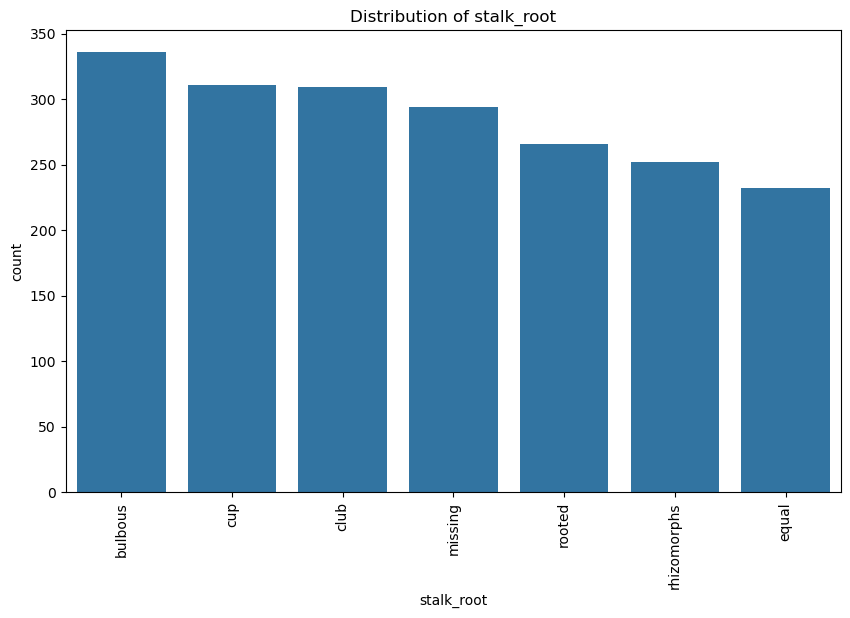

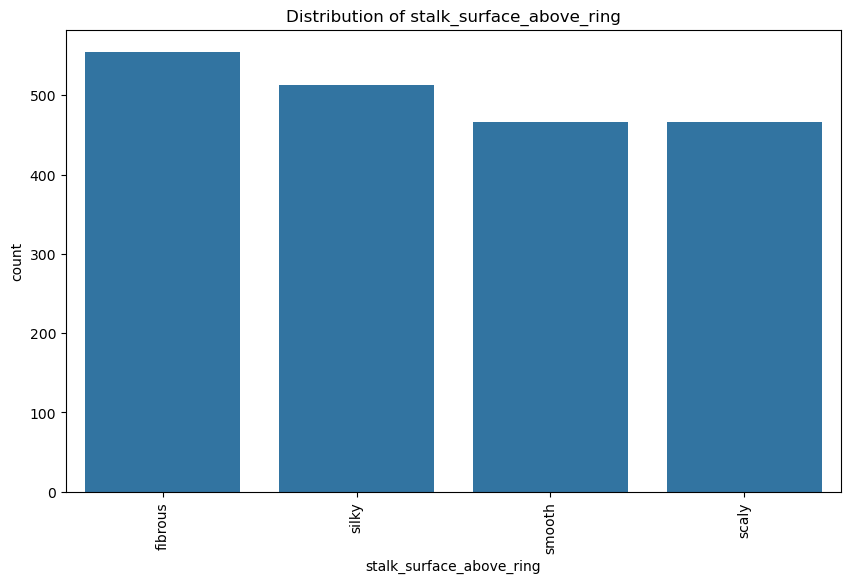

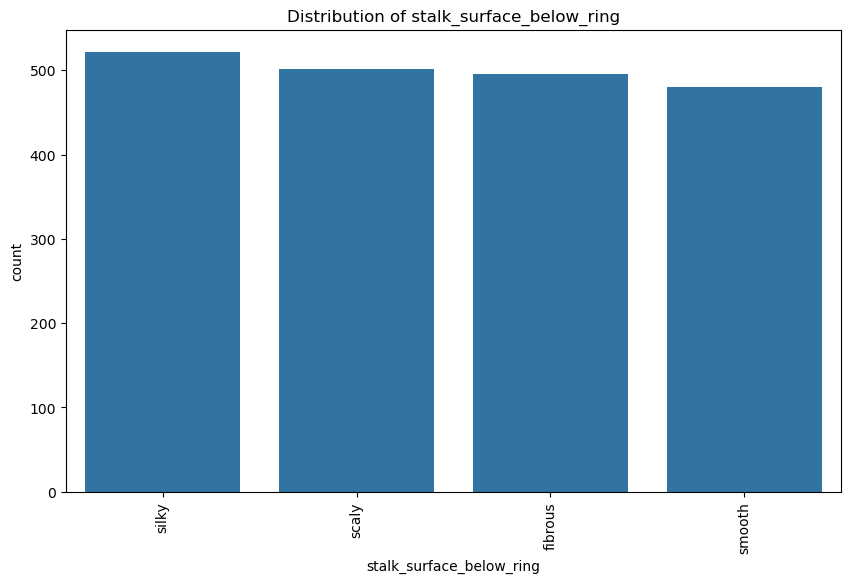

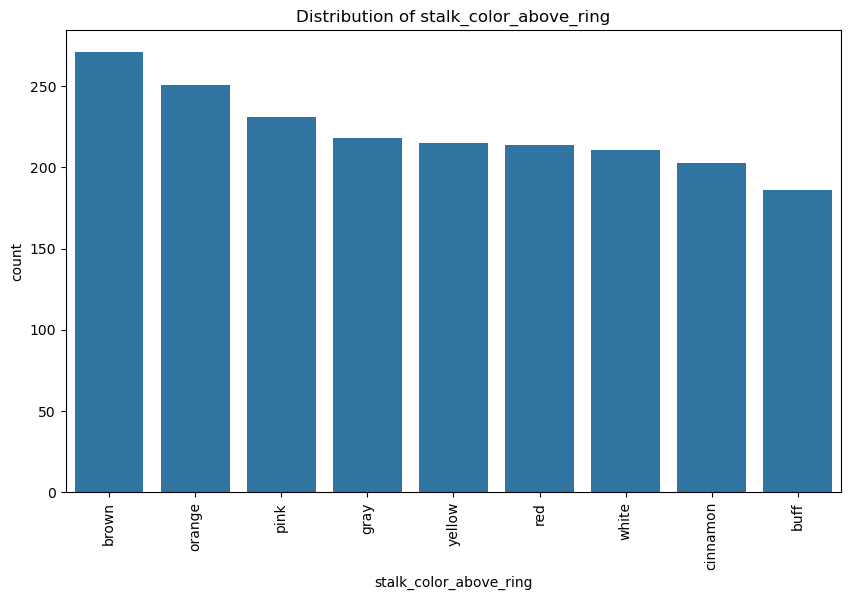

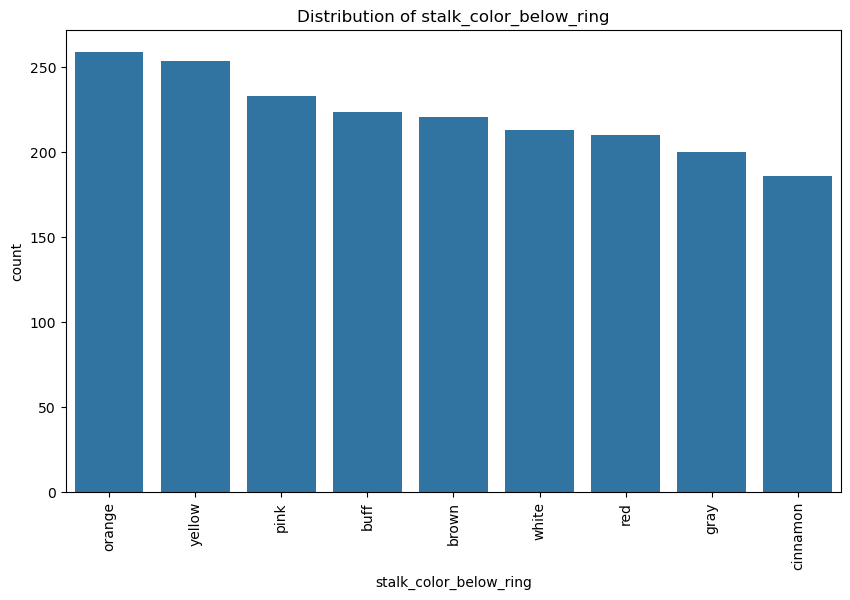

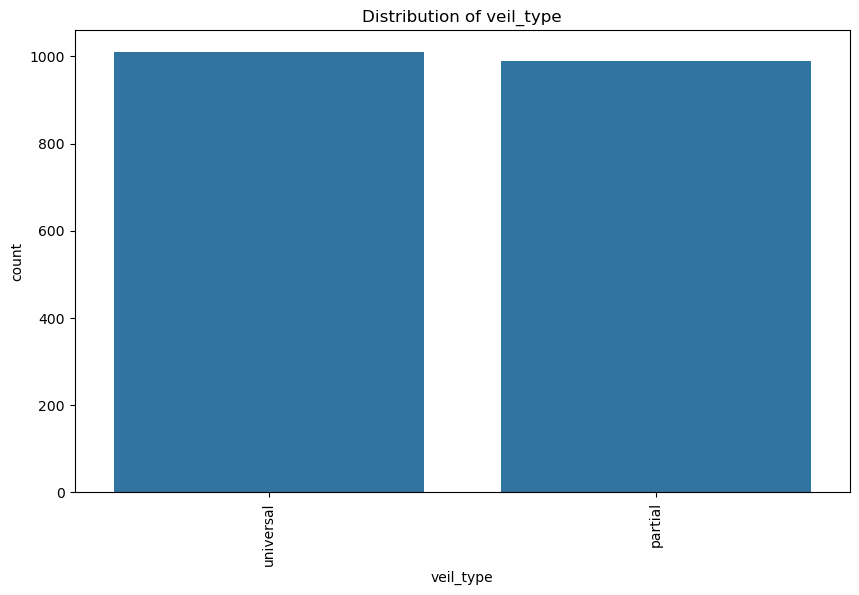

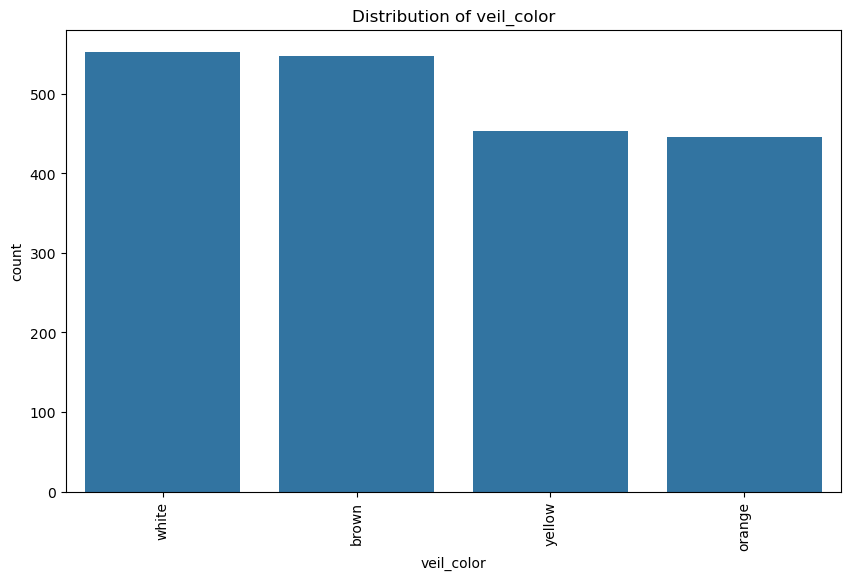

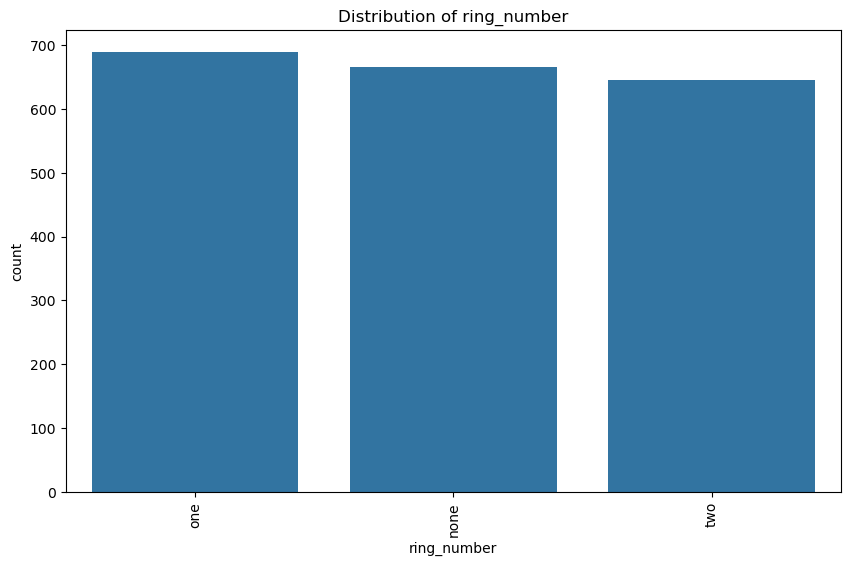

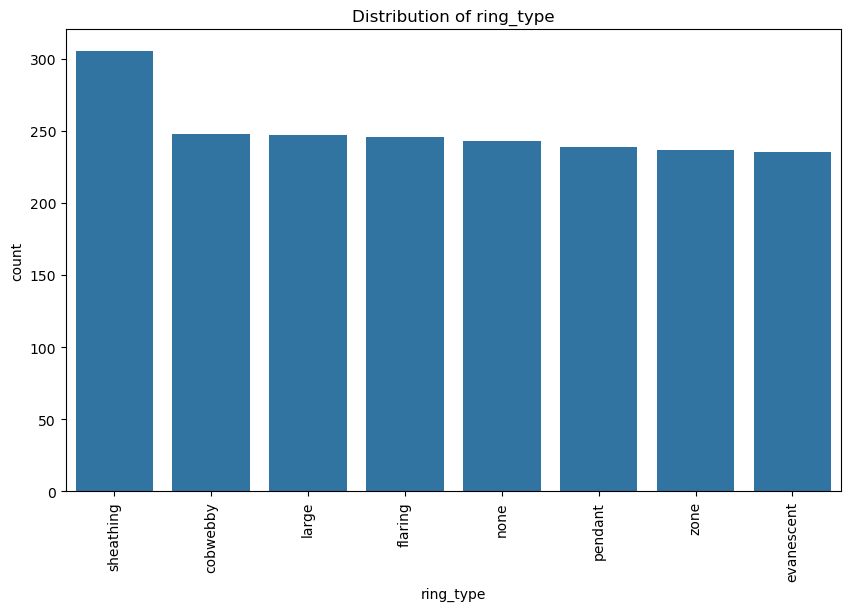

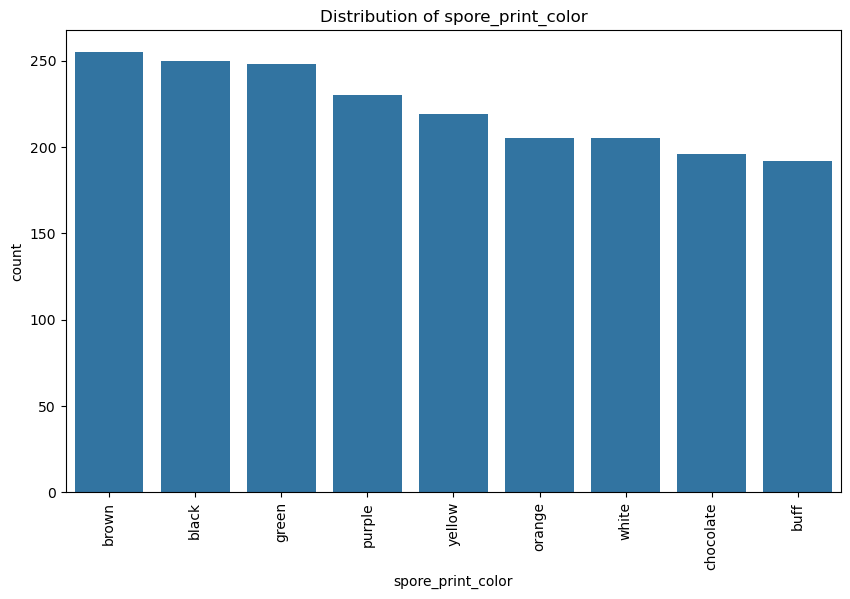

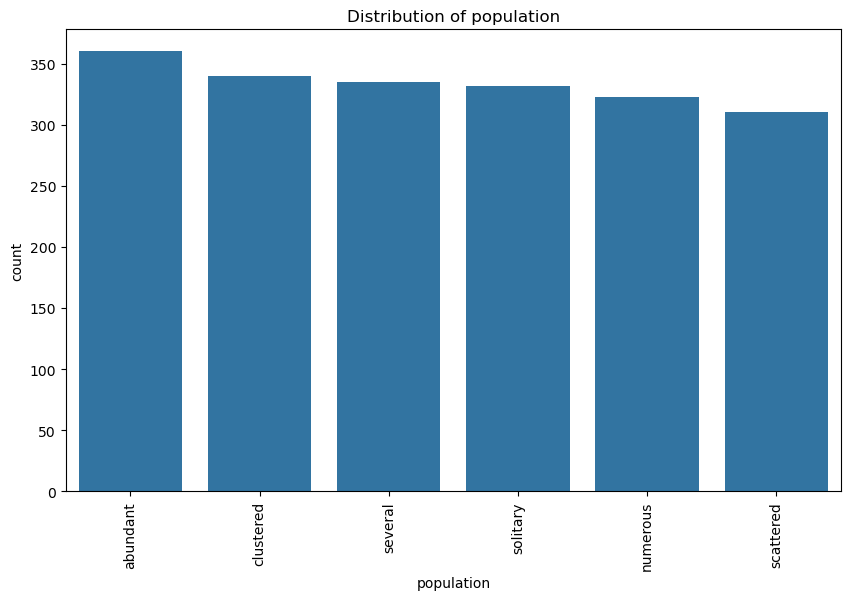

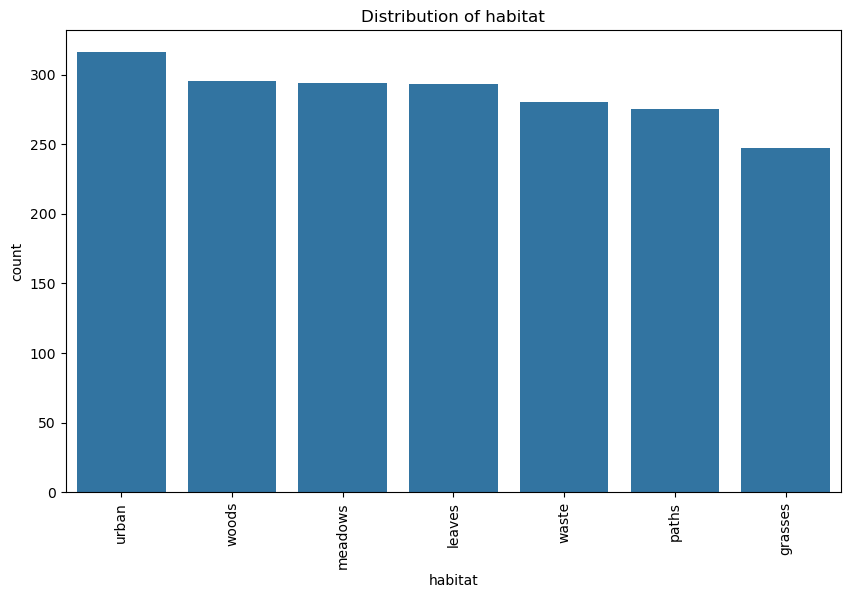

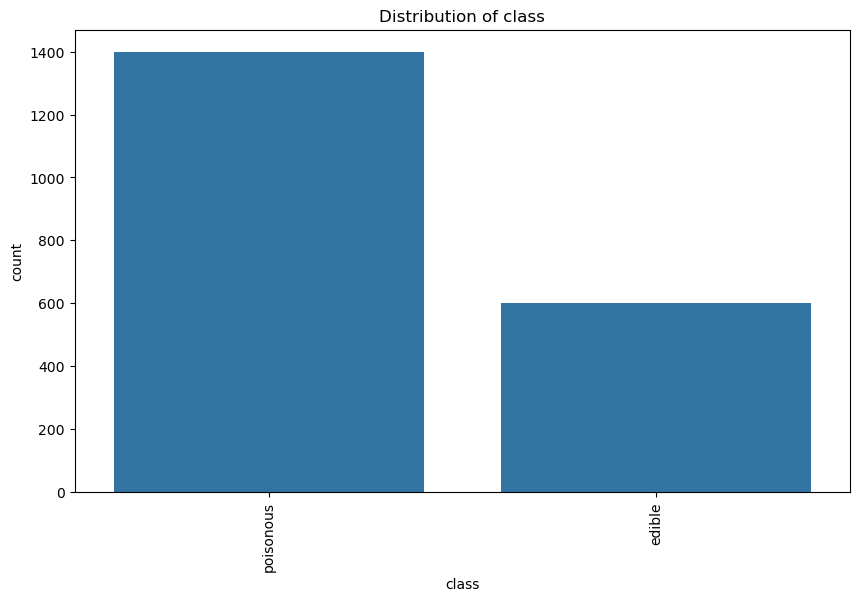


Preparing the data for our SVM model...

Data preprocessing complete!
Original features shape: (2000, 23)
Encoded features shape: (2000, 103)
Training set shapes: X_train:(1400, 103), y_train:(1400,)
Testing set shapes: X_test:(600, 103), y_test:(600,)


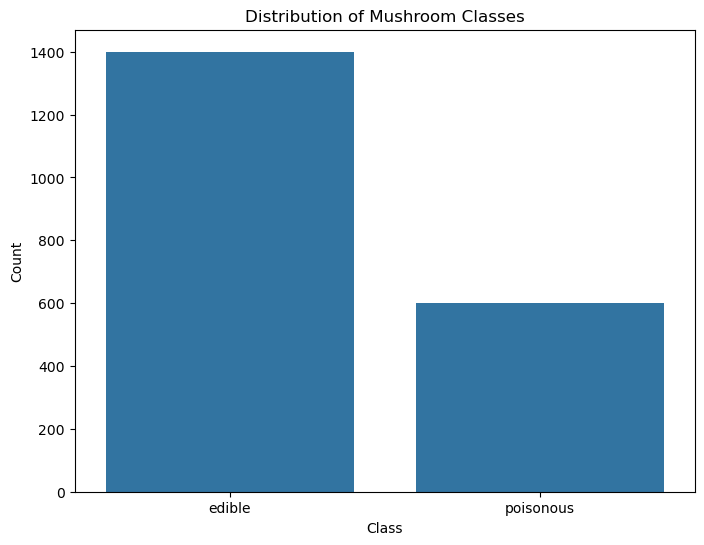


Training a simple SVM classifier with a linear kernel...
Model training finished!

Initial Model Evaluation
Accuracy: 0.6917

Classification Report
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       185
   poisonous       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


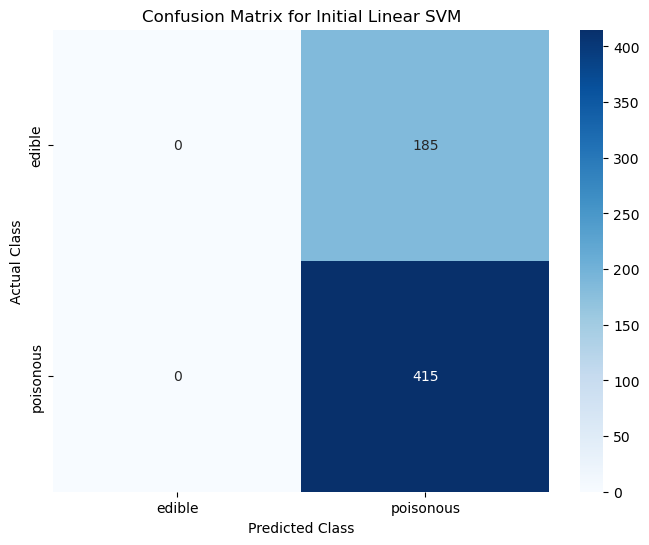


Okay, let's see if we can do better by tuning our model...
Starting a grid search to find the best C and kernel.
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .......

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

print("Loading the mushroom dataset...")
mushroom_data = pd.read_csv('mushroom.csv')

print("\nHere's what the first few rows look like:")
print(mushroom_data.head())

mushroom_data.info()

if 'Unnamed: 0' in mushroom_data.columns:
    mushroom_data = mushroom_data.drop('Unnamed: 0', axis=1)

print("\nPerforming some Exploratory Data Analysis...")

categorical_features = mushroom_data.select_dtypes(include=['object']).columns
numerical_features = mushroom_data.select_dtypes(include=[np.number]).columns 

print("\nPlotting histograms for numerical features...")
mushroom_data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

print("\nCreating a correlation matrix for numerical features...")
plt.figure(figsize=(10, 8))
sns.heatmap(mushroom_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nVisualizing the distribution of categorical features...")
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=mushroom_data, x=column, order=mushroom_data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

print("\nPreparing the data for our SVM model...")

if 'veil_type' in mushroom_data.columns:
    mushroom_data = mushroom_data.drop('veil_type', axis=1)

X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("\nData preprocessing complete!")
print(f"Original features shape: {X.shape}")
print(f"Encoded features shape: {X_encoded.shape}")
print(f"Training set shapes: X_train:{X_train.shape}, y_train:{y_train.shape}")
print(f"Testing set shapes: X_test:{X_test.shape}, y_test:{y_test.shape}")

plt.figure(figsize=(8, 6))
sns.countplot(x=y, data=mushroom_data)
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['edible', 'poisonous'])
plt.show()

print("\nTraining a simple SVM classifier with a linear kernel...")
basic_svm_model = SVC(kernel='linear', random_state=42)
basic_svm_model.fit(X_train, y_train)

print("Model training finished!")

initial_predictions = basic_svm_model.predict(X_test)

print("\nInitial Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, initial_predictions):.4f}")

print("\nClassification Report")
print(classification_report(y_test, initial_predictions, target_names=label_encoder.classes_))

cm_initial = confusion_matrix(y_test, initial_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_initial, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Initial Linear SVM')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print("\nOkay, let's see if we can do better by tuning our model...")
print("Starting a grid search to find the best C and kernel.")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)

print("Grid search complete!")

print("\nBest Parameters and Score from Grid Search")
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_svm_model = grid_search.best_estimator_
tuned_predictions = best_svm_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_predictions)

print(f"\nAccuracy of the fine-tuned model on the test data: {tuned_accuracy:.4f}")
print("\nClassification Report for the Tuned Model")
print(classification_report(y_test, tuned_predictions, target_names=label_encoder.classes_))

--- Training a simple SVM with a linear kernel for a baseline comparison ---

--- Classification Report for the Baseline Linear Kernel SVM ---
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       185
   poisonous       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

--------------------------------------------------

--- Now, let's use GridSearchCV to find the best RBF kernel settings ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s


C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................

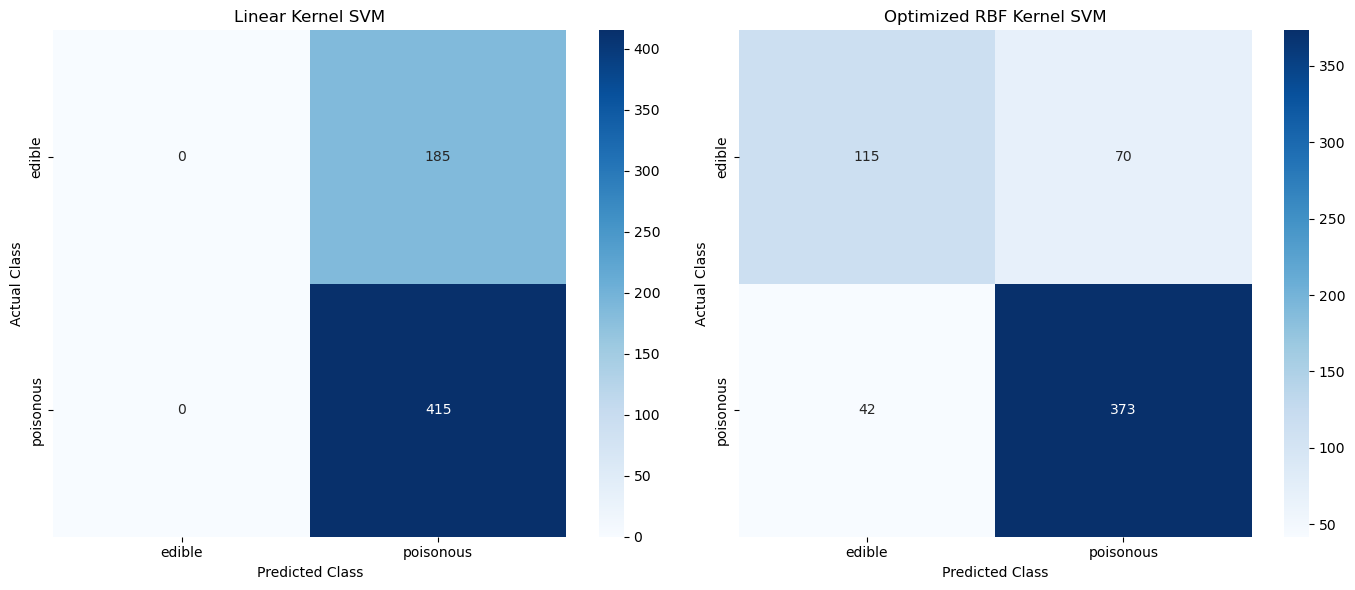

In [1]:
#
# Comparing SVM Kernels: Linear vs. Tuned RBF

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df = pd.read_csv('mushroom.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
if 'veil_type' in df.columns:
    df = df.drop('veil_type', axis=1)

X = df.drop('class', axis=1)
y = df['class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)


print("Training a simple SVM with a linear kernel for a baseline comparison......")
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)
print("\nClassification Report for the Baseline Linear Kernel SVM....")
print(classification_report(y_test, y_pred_linear, target_names=le.classes_))


print("\nNow, using GridSearchCV to find the best RBF kernel settings.....")

param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}


grid_search = GridSearchCV(SVC(), param_grid_rbf, cv=5, scoring='accuracy', verbose=2, n_jobs=1)
grid_search.fit(X_train, y_train)

best_rbf_svm = grid_search.best_estimator_

y_pred_rbf = best_rbf_svm.predict(X_test)
print("Grid search completed!")

print("\nClassification Report for the Optimized RBF Kernel SVM....")
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_))


print("\nVisualizing the confusion matrices to see the difference firsthand...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for the Linear SVM
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0])
axes[0].set_title('Linear Kernel SVM')
axes[0].set_ylabel('Actual Class')
axes[0].set_xlabel('Predicted Class')

# Confusion Matrix for the Tuned RBF SVM
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[1])
axes[1].set_title('Optimized RBF Kernel SVM')
axes[1].set_ylabel('Actual Class')
axes[1].set_xlabel('Predicted Class')

plt.tight_layout()
plt.show()